# Minimal example of Detach-MiniROCKET channel relevance
Test with a real UEA dataset

In [1]:
!pip install aeon --quiet
!pip install tsai --quiet
!pip install sktime --quiet
!pip install git+https://github.com/gon-uri/detach_rocket --quiet
!pip install git+https://github.com/AdriaSolana/detachminirocket-channel-relevance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
from detachminirocket_channel_relevance.classes import download_dataset, ReROCKETTransformer, SoftVoteAvgReROCKETPredictor
from sklearn.metrics import accuracy_score

TRAINING RESULTS Detach Model:
Optimal Alpha Detach Model: 99.00
Train Accuraccy Detach Model: 72.47%
-------------------------


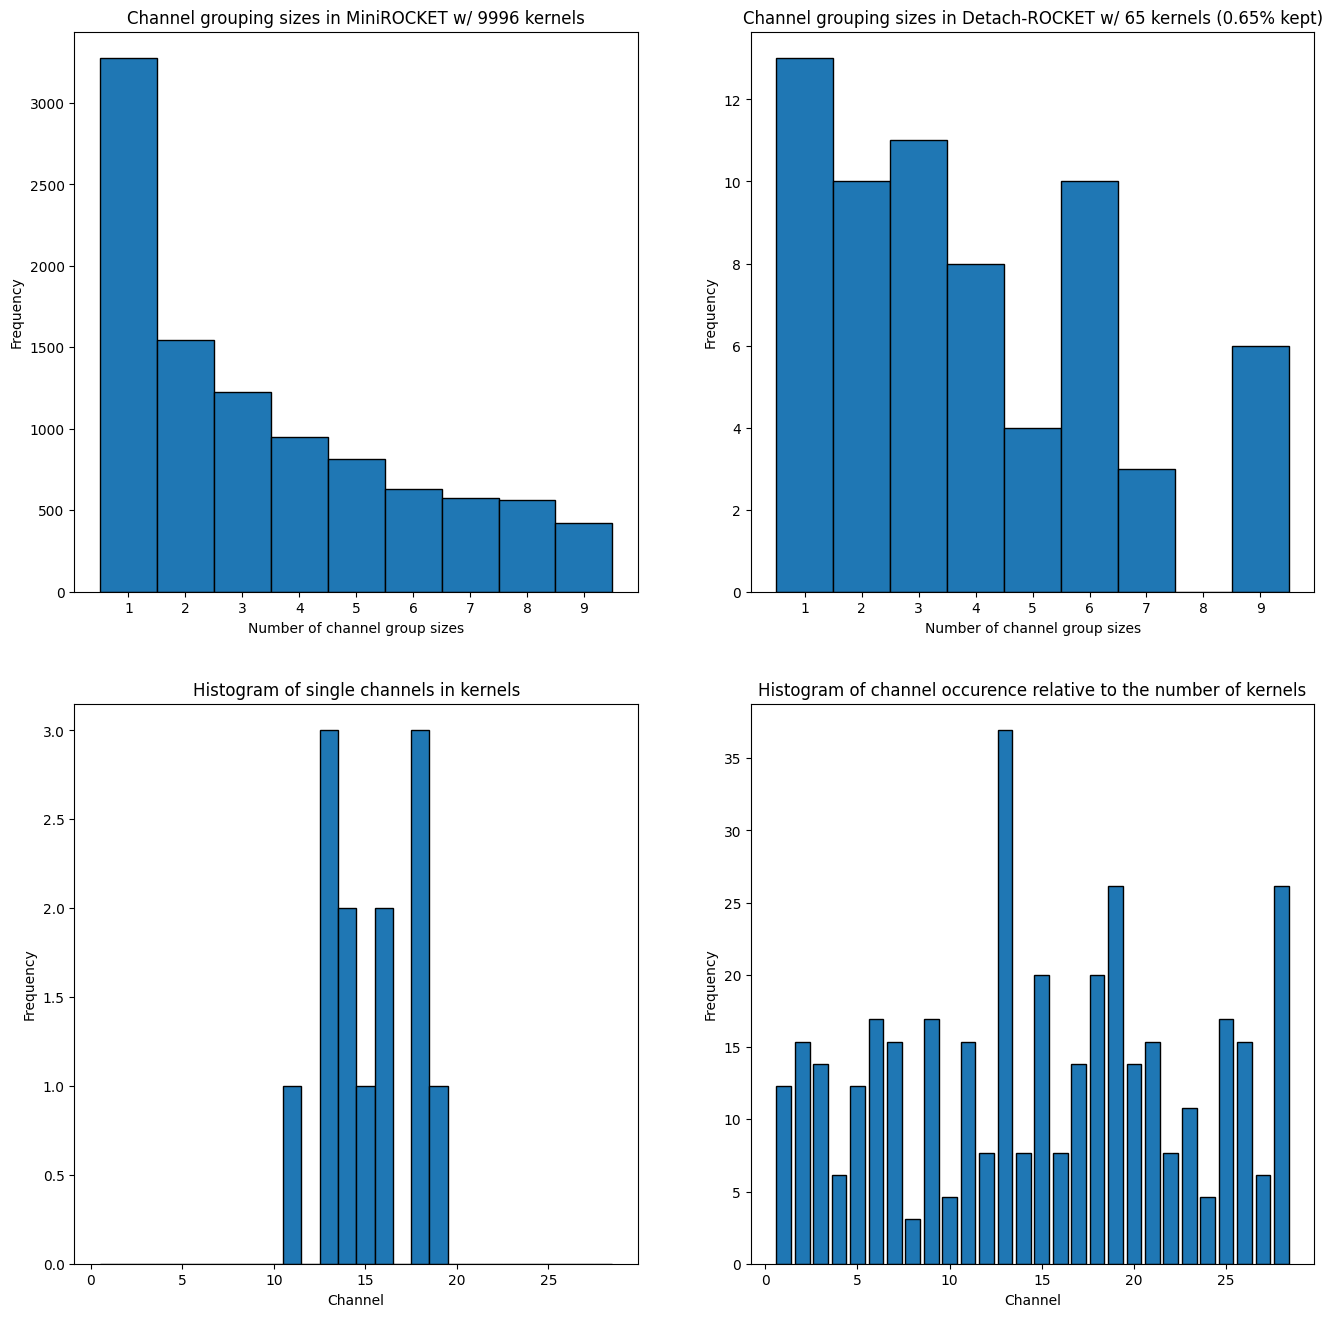

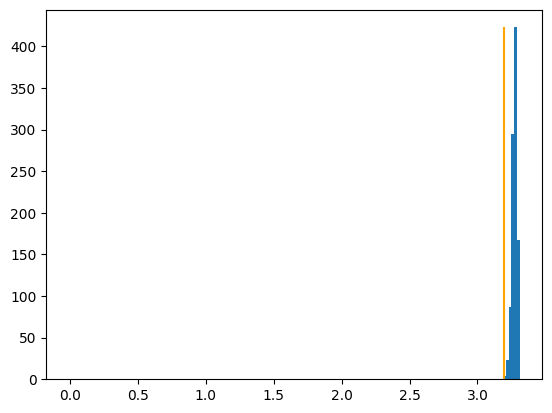

P-value 0.004004004004004004


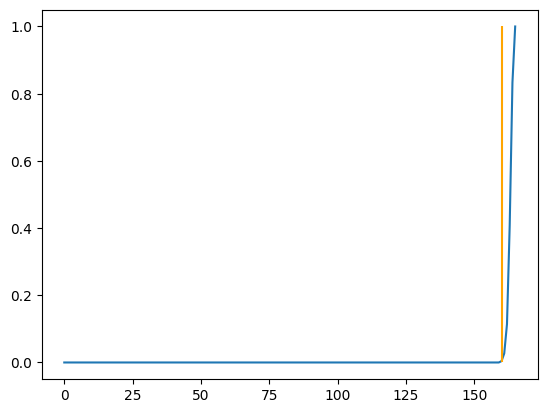

(0.7246835443037974, 0.51)

In [3]:
num_models = 1
num_kernels = 10000
transformer = ReROCKETTransformer('torchminirocket', num_models=num_models, num_kernels=num_kernels, feature_fraction_kept='auto')

X_train, X_test, y_train, y_test = download_dataset('FingerMovements')

X_train_rerocket = transformer.fit_transform([X_train]*num_models, [y_train]*num_models)
transformer.plot_channel_frequency()
transformer.show_channel_p_value()
X_test_rerocket = transformer.transform([X_test]*num_models)

predictor = SoftVoteAvgReROCKETPredictor(transformer.get_classifiers()).fit(X_train_rerocket, y_train)
pred_train = predictor.predict(X_train_rerocket)
pred_test = predictor.predict(X_test_rerocket)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)